# Классический градиентный спуск

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import re

Рассмотрены следующие функции:
- хорошо обусловленная (µ ≃ 1) двумерная квадратичная функция;
- плохо обусловленная (µ > 10) двумерная квадратичная функция;
- функция Розенброка.

In [4]:
def f_well(x):
    return 0.8 * x[0]**2 + 1.2 * x[1]**2 + 0.4 * x[0]*x[1]

def f_poor(x):
    return 2 * x[0]**2 + 205 * x[1]**2 - 10 * x[0]*x[1] + 20 * x[0] + 30 * x[1] + 23

def f_rozen(x):
    return (1-x[0])**2 + 100 * (x[1]-x[0]**2)**2

Их градиенты.

In [5]:
def grad_well(x):
    return np.array([2*x, 2*y])  # градиент

## Графики функций

In [6]:
x1_min = -10.0
x1_max = 10.0
x2_min = -10.0
x2_max = 10.0
N = 1000

x = np.empty((2,), dtype=object)
x[0] = np.linspace(x1_min, x1_max, N)
x[1] = np.linspace(x2_min, x2_max, N)
X, Y = np.meshgrid(x[0], x[1])

func_names = [f_well, f_poor, f_rozen]
func_labels = ['Well-conditioned',
               'Poorly-conditioned',
               'Rosenbrock']

N_func = len(func_names)

Z = np.empty((N_func,), dtype=object)

for k, func in enumerate(func_names):
    Z[k] = func([X, Y])

Настройки форматирования графиков.

In [7]:
user_figsize = (10,5)
user_fontsize = 24
user_tickfontsize = 12

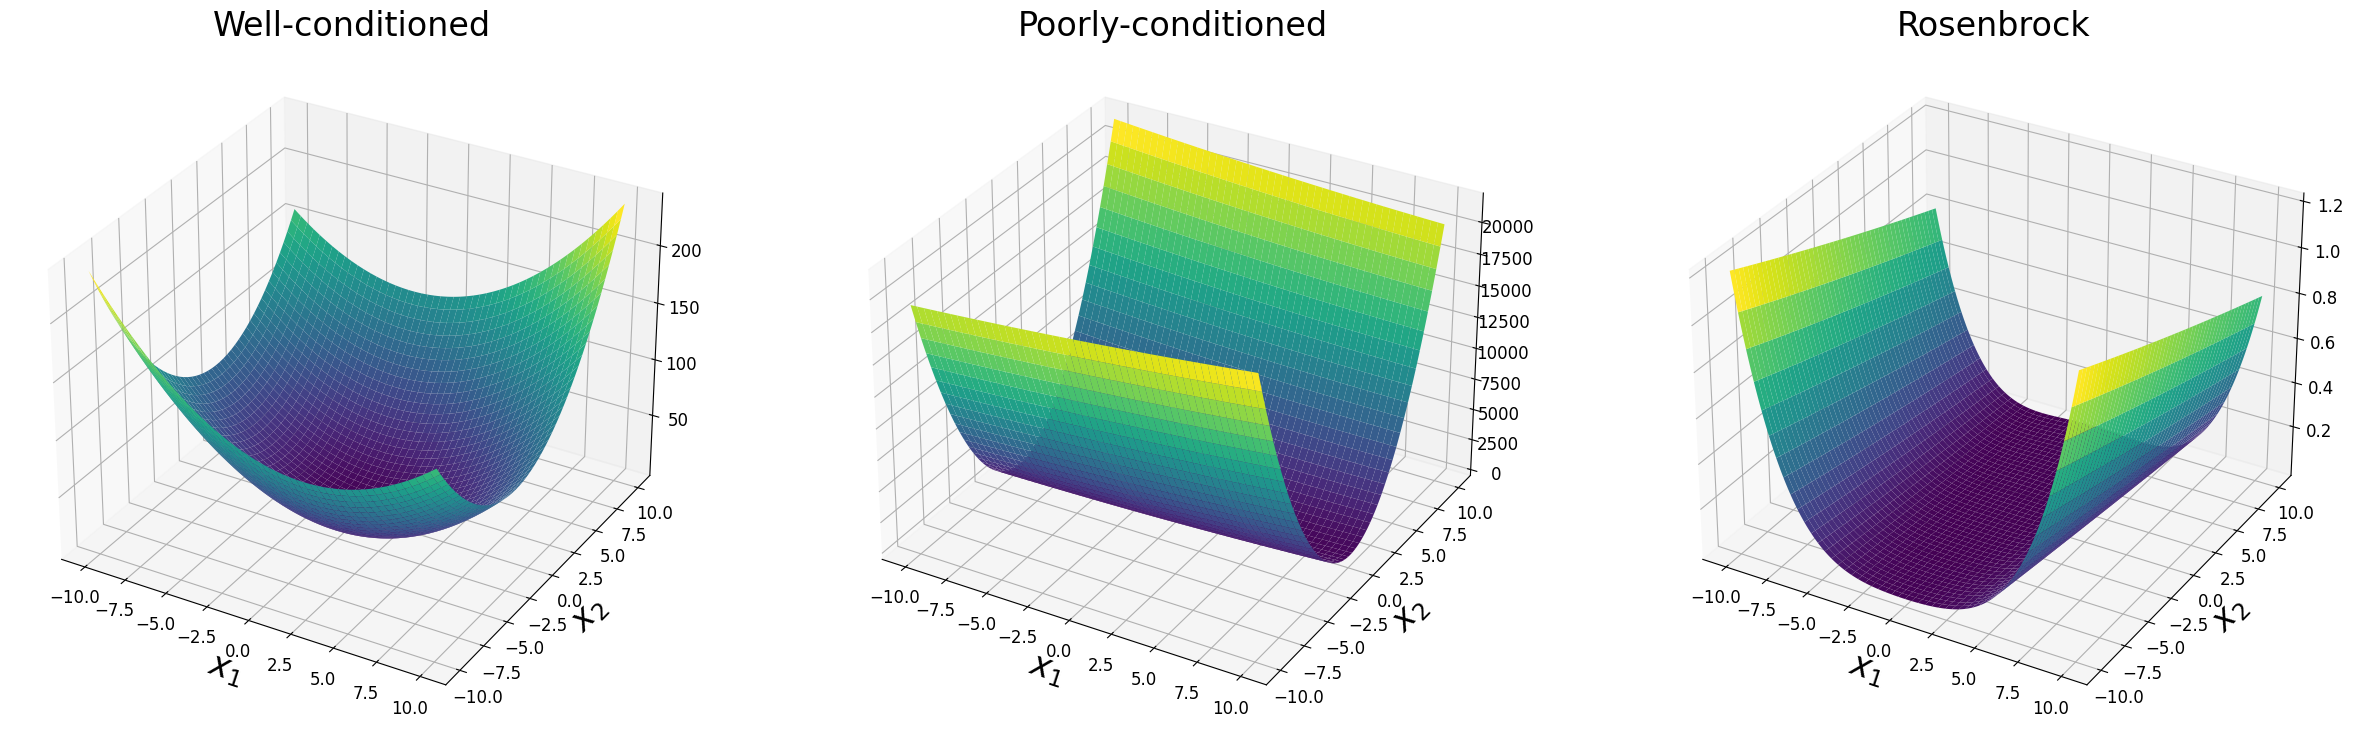

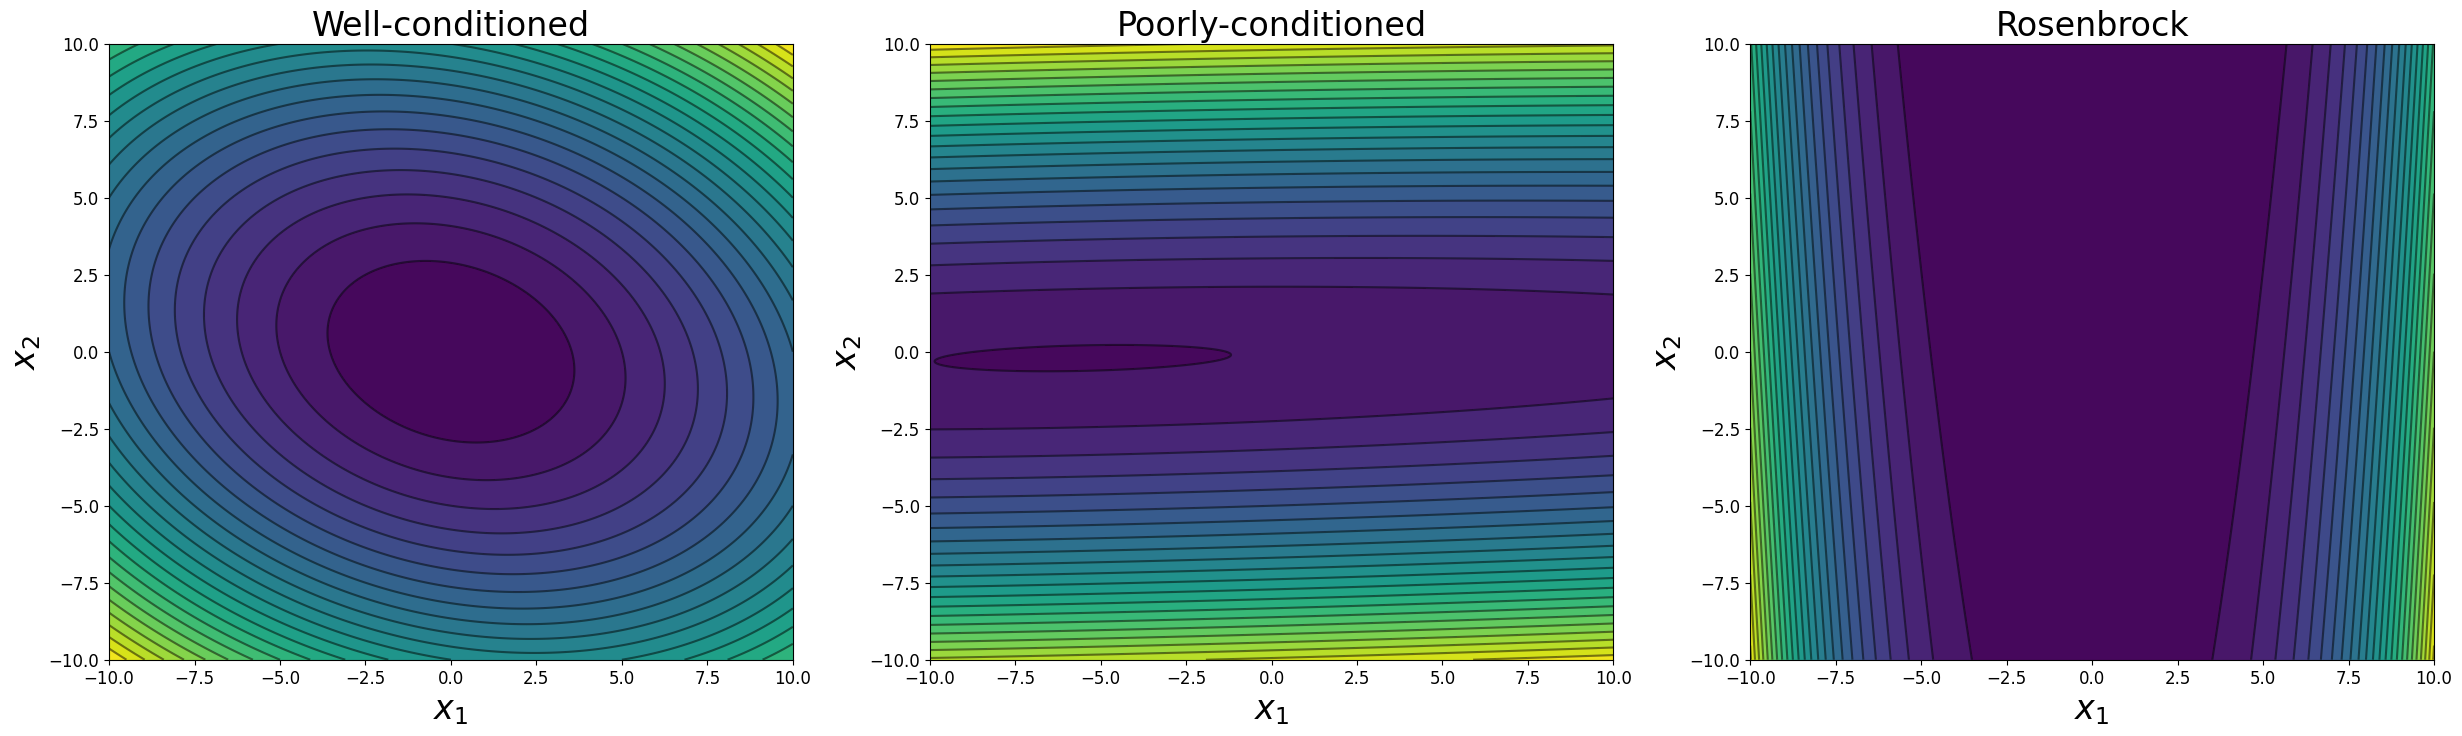

In [8]:
fig, axs = plt.subplots(ncols=N_func, nrows=1, figsize=(10*N_func, 10), subplot_kw={'projection': '3d'})
for k, z, func_lbl in zip(range(N_func), Z, func_labels):
    axs[k].plot_surface(X, Y, z, cmap='viridis', edgecolor='none')    
    axs[k].set_xlabel('$x_1$', fontsize=user_fontsize)
    axs[k].set_ylabel('$x_2$', fontsize=user_fontsize)
    axs[k].set_title(func_lbl, fontsize=user_fontsize)
    
    axs[k].tick_params(axis='x', labelsize=user_tickfontsize)
    axs[k].tick_params(axis='y', labelsize=user_tickfontsize)
    axs[k].tick_params(axis='z', labelsize=user_tickfontsize)
plt.show()

fig, axs = plt.subplots(ncols=N_func, nrows=1, figsize=(10*N_func, 8))
for k, z, func_lbl in zip(range(N_func), Z, func_labels):
    contour = axs[k].contour(X, Y, z, levels=25, colors='black', alpha=0.5)
    axs[k].contourf(X, Y, z, levels=25, cmap='viridis')
    axs[k].set_xlabel('$x_1$', fontsize=user_fontsize)
    axs[k].set_ylabel('$x_2$', fontsize=user_fontsize)
    axs[k].set_title(func_lbl, fontsize=user_fontsize)
    
    axs[k].tick_params(axis='x', labelsize=user_tickfontsize)
    axs[k].tick_params(axis='y', labelsize=user_tickfontsize)
plt.show()

## Метод градиентного спуска с постоянным шагом

In [ ]:
def classic_grad(loss_func, grad_func, x, learning_rate, tolerance):
    t_init = time.time()
    
    iteration_max = 200000
    
    losses = []
    
    for i in range(iteration_max):
        grad = grad_func(x)
        x_prev = x.copy()
        
        x -= learning_rate * grad
        
        x_norm = np.linalg.norm((x - x_prev), ord=None, axis=None)
        
        loss = loss_func(x)
        losses.append(loss)
        
        if i % 100 == 0:
            #clear_output(wait=True)
            print('Iteration:', i)
            print('x-values:', np.round(x,4))
            print('x-norm:', np.round(x_norm,4))
            #print('Gradient:', np.round(grad,4))
            print('Loss:', np.round(loss,4))
            
        if (x_norm < tolerance):
            break
    
    iter_final = i
    fit_time = time.time() - t_init
    return x, losses#, iter_final, fit_time

In [25]:
def loss_func(x):
    return 2 * (x[0]+1)**2 + 3 * x[1]**2
def grad_func(x):
    return np.array([4 * x[0] + 4, 6 * x[1]])

In [27]:
x_optim, losses = classic_grad(loss_func, grad_func, x=np.array([1.1, 1.2]), learning_rate=np.array([1e-3, 1e-3]), tolerance=1e-9)

Iteration: 0
x-values: [1.0916 1.1928]
x-norm: 0.0111
Loss: 13.0179
Iteration: 100
x-values: [0.4009 0.6534]
x-norm: 0.0069
Loss: 5.2061
Iteration: 200
x-values: [-0.0617  0.358 ]
x-norm: 0.0043
Loss: 2.1453
Iteration: 300
x-values: [-0.3715  0.1961]
x-norm: 0.0028
Loss: 0.9053
Iteration: 400
x-values: [-0.5791  0.1074]
x-norm: 0.0018
Loss: 0.389
Iteration: 500
x-values: [-0.7181  0.0589]
x-norm: 0.0012
Loss: 0.1694
Iteration: 600
x-values: [-0.8112  0.0322]
x-norm: 0.0008
Loss: 0.0744
Iteration: 700
x-values: [-0.8735  0.0177]
x-norm: 0.0005
Loss: 0.0329
Iteration: 800
x-values: [-0.9153  0.0097]
x-norm: 0.0003
Loss: 0.0146
Iteration: 900
x-values: [-0.9433  0.0053]
x-norm: 0.0002
Loss: 0.0065
Iteration: 1000
x-values: [-0.962   0.0029]
x-norm: 0.0002
Loss: 0.0029
Iteration: 1100
x-values: [-0.9745  0.0016]
x-norm: 0.0001
Loss: 0.0013
Iteration: 1200
x-values: [-9.83e-01  9.00e-04]
x-norm: 0.0001
Loss: 0.0006
Iteration: 1300
x-values: [-9.886e-01  5.000e-04]
x-norm: 0.0
Loss: 0.0003
I

In [19]:
x = np.array([2, 8], dtype=float)
alpha = np.array([0.1, 0.2])
grad = np.array([3, 4], dtype=float)
x -= alpha * grad

print(x)
print(np.linalg.norm(x, ord=None, axis=None))
print(np.sqrt(x[0]**2 + x[1]**2))

[1.7 7.2]
7.397972695272672
7.397972695272672
